### Task
The proposed files contain information from Moscow's public hearings on land use and development rules (LPP). In them, the comments of the city's residents were shorthand, classified (for/against), and mapped. The data is provided in 2 versions, you can use any of them for the task:

geo_comment.xlsx
comment - комментарий одного или списка жителей к проект
multiplier - количество авторов комментария (может быть 1, может быть список)
x, y - координаты адреса, по которому был дан определённой комментарий
comment_class - за (1) / против (-1)
geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть multiplier > 1 голоса)
x, y - координаты адреса, по которому был дан определённой комментарий
comment_class - за (1) / против (-1)
### Обязательное задание
визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
аналогично исследовать скопления голосов за и против отдельно
подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)
приложить ноутбук
### Дополнительные задания
найти наиболее активные в голосовании районы (подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')
для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

## Загружаем библиотеки и считываем данные

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation

In [2]:
geo = pd.read_excel('/Users/mariashemyakina/Downloads/geo.xlsx')


In [3]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108806 entries, 0 to 108805
Data columns (total 4 columns):
Unnamed: 0       108806 non-null int64
x                108806 non-null float64
y                108806 non-null float64
comment_class    108806 non-null int64
dtypes: float64(2), int64(2)
memory usage: 3.3 MB


In [4]:
geo.head()

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1


In [5]:
geo.drop('Unnamed: 0', axis=1, inplace=True)


In [6]:
geo.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [7]:
geo_comment = pd.read_excel('/Users/mariashemyakina/Downloads/geo_comment.xlsx')

In [8]:
geo_comment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70382 entries, 0 to 70381
Data columns (total 6 columns):
Unnamed: 0       70382 non-null int64
x                70382 non-null float64
y                70382 non-null float64
comment_class    70382 non-null int64
multiplier       70382 non-null int64
comment          70382 non-null object
dtypes: float64(2), int64(3), object(1)
memory usage: 3.2+ MB


In [9]:
geo_comment.drop('Unnamed: 0', axis=1, inplace=True)



In [10]:
geo_comment.head()

,x,y,comment_class,multiplier,comment
0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


In [11]:
geo_comment.sample(5)

,x,y,comment_class,multiplier,comment
68380,37.424057,55.854779,-1,1,Просим внести в протокол публичных слушаний на...
20800,37.805293,55.799532,1,1,"Я, нижеподписавшийся, житель района Северное И..."
54734,37.698520,55.773748,1,1,"Хорошо, что город и округ развиваются, строите..."
19215,37.570887,55.741389,1,1,"Я, нижеподписавшийся, житель района Северное И..."
61744,37.363879,55.845355,-1,1,"К Вам обращаются жители района «Митино», проси..."


In [12]:
X = np.array(geo[['x', 'y']])
y = np.array(geo['comment_class'])

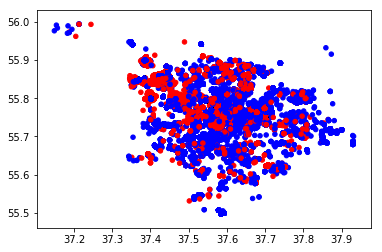

In [13]:
plt.scatter(X[:,0], X[:,1], c = y, cmap = 'bwr',  s = 20)

Проведем кластеризацию безотносительно голосов

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
geo_scaled = scaler.fit_transform(geo)
geo_scaled=pd.DataFrame(geo_scaled, columns=geo.columns)

/Users/mariashemyakina/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/mariashemyakina/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [16]:
geo_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108806 entries, 0 to 108805
Data columns (total 3 columns):
x                108806 non-null float64
y                108806 non-null float64
comment_class    108806 non-null float64
dtypes: float64(3)
memory usage: 2.5 MB


In [17]:
geo_scaled.head()

,x,y,comment_class
0,0.367919,0.159553,-0.378889
1,0.367919,0.159553,-0.378889
2,0.293178,-0.348131,-0.378889
3,-0.073819,-0.539880,-0.378889
4,-0.009022,-0.496273,-0.378889


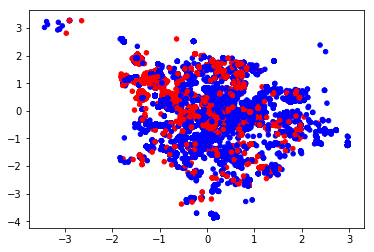

In [18]:
plt.scatter(geo_scaled['x'], geo_scaled['y'], c=geo_scaled['comment_class'], cmap='bwr', s=20)



In [19]:
from sklearn.cluster import KMeans

In [20]:
alg = KMeans(n_clusters = 12)

In [21]:
clusters = alg.fit_predict(geo_scaled)

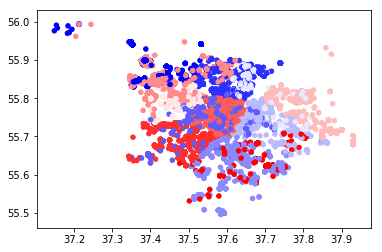

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='bwr', s=20)

### Разделим наши данные на тех, кто голосовал "За" и тех, кто "Против" (1 и -1 соответственно)

In [23]:
X = np.array(geo[['x', 'y']][geo['comment_class'] == 1])

In [24]:
X_scaled = scaler.fit_transform(X)

In [25]:
clusters = alg.fit_predict(X_scaled)

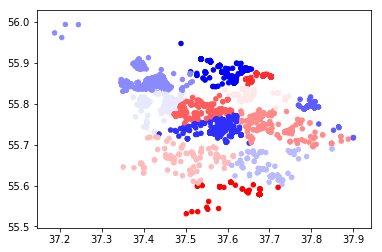

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='bwr', s=20)

In [27]:
X = np.array(geo[['x', 'y']][geo['comment_class'] == -1])

In [28]:
X_scaled = scaler.fit_transform(X)

In [29]:
clusters = alg.fit_predict(X_scaled)

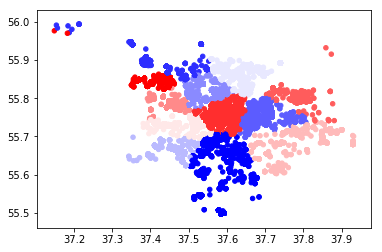

In [30]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='bwr', s=20)

Как видим, против проголосовало больше народа

### Подоберем оптимальное число кластеров

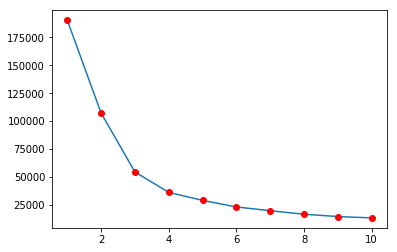

In [31]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

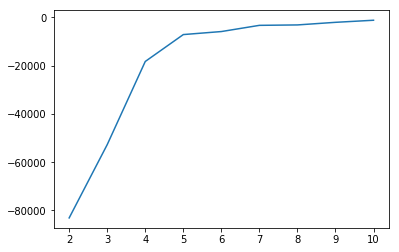

In [32]:
diff = np.diff(k_inertia)
plt.plot(ks[1:], diff)

In [33]:
diff_r = diff[1:] / diff[:-1]
k_opt = ks[np.argmin(diff_r)+1]
print('Оптимально число кластеров:', k_opt)

Оптимально число кластеров: 3


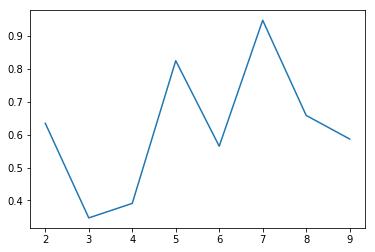

In [37]:
plt.plot(ks[1:-1],diff_r)

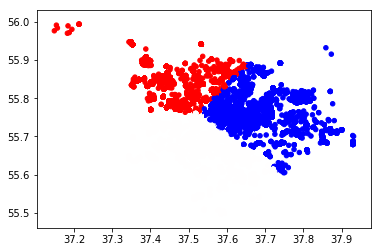

In [38]:
alg = KMeans(n_clusters=3)
clusters = alg.fit_predict(X_scaled)
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='bwr', s=20)